In [1]:
import ULF_duct_plot_detail as udp
import calc_integral_chorus as cic
import ULF_duct_plot_ver2 as udp2
import calc_stokes as cs
import pytplot
import pyspedas
import plasma_params as pp
import numpy as np

download_trange = ['2017-04-05', '2017-04-06']

""" 
'ne_mgf',\
        'kvec_polar_132',\
        'erg_pwe_ofa_l2_spec_B_spectra_132','erg_pwe_ofa_l2_spec_E_spectra_132',\
        'erg_mepe_l2_omniflux_FEDO',\
        'erg_mepe_l3_pa_FEDU_87.5keV', 'erg_mepe_l3_pa_FEDU_72.6keV', 'erg_mepe_l3_pa_FEDU_60.4keV','erg_mepe_l3_pa_FEDU_50.3keV', 'erg_mepe_l3_pa_FEDU_42.0keV','erg_mepe_l3_pa_FEDU_35.0keV','erg_mepe_l3_pa_FEDU_29.3keV','erg_mepe_l3_pa_FEDU_24.5keV','erg_mepe_l3_pa_FEDU_20.5keV','erg_mepe_l3_pa_FEDU_17.1keV','erg_mepe_l3_pa_FEDU_14.3keV','erg_mepe_l3_pa_FEDU_12.0keV',\
            'delta_z', 'erg_mgf_l2_magt_8sec','erg_mgf_l2_mag_8sec_MAF_x&y',\
            'erg_orb_l2_pos_rmlatmlt','erg_orb_l2_pos_eq' == udp2.ULF_duct_load(download_trange)
 """
r1 = ['2017-04-05 21:40:00', '2017-04-05 22:20:00']

In [2]:


def calc_refractive_index(download_trange, f, theta, density=None):
    from pyspedas.erg import mgf
    mgf(trange=download_trange)

    if density is not None:
        re_in = (80.6*density)**(-1/2)/((pp.Q*pytplot.data_quants['erg_mgf_l2_magt_8sec']*f/pp.ME)**(1/2)*(np.cos(theta))-pp.ME*f/(pp.Q*pytplot.data_quants['erg_mgf_l2_magt_8sec']))

    else:
        
        lst = download_trange[0].split('-')
        pytplot.cdf_to_tplot('./erg_data/satellite/erg/pwe/hfa/l3/1min/'+lst[0]+'/'+lst[1]+'/erg_pwe_hfa_l3_1min_'+lst[0]+lst[1]+lst[2]+'_v03_07.cdf')
        pyspedas.tinterpol('ne_mgf', 'erg_mgf_l2_magt_8sec', newname='ne_mgf_interpolated')
        re_in = (80.6*pytplot.data_quants['ne_mgf_interpolated'])**(-1/2)/((pp.Q*pytplot.data_quants['erg_mgf_l2_magt_8sec']*f/pp.ME)**(1/2)*(np.cos(theta))-pp.ME*f/(pp.Q*pytplot.data_quants['erg_mgf_l2_magt_8sec']))
    
    pytplot.store_data('re_in', data={'x': pytplot.data_quants['ne_mgf_interpolated']['time'], 'y': re_in})
    pytplot.options('re_in', opt_dict={'ytitle':'Refractive Index','ylog':0})

    return 're_in'
      

In [3]:
f = 0.6*10**3
theta = 0

're_in' == calc_refractive_index(download_trange, f, theta)

06-Jun-23 18:12:35: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/04/
06-Jun-23 18:12:35: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/04/erg_mgf_l2_8sec_20170405_v03.04.cdf
06-Jun-23 18:12:35: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

06-Jun-23 18:12:35: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

06-Jun-23 18:12:35: tinterpol (linear) was applied to: ne_mgf_interpolated


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


True

In [4]:
from pyspedas.erg import mgf
mgf(trange=download_trange)

06-Jun-23 18:12:35: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/04/
06-Jun-23 18:12:35: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/04/erg_mgf_l2_8sec_20170405_v03.04.cdf
06-Jun-23 18:12:35: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

06-Jun-23 18:12:35: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_mgf_l2_epoch_8sec',
 'erg_mgf_l2_mag_8sec_dsi',
 'erg_mgf_l2_mag_8sec_gse',
 'erg_mgf_l2_mag_8sec_gsm',
 'erg_mgf_l2_mag_8sec_sm',
 'erg_mgf_l2_magt_8sec',
 'erg_mgf_l2_rmsd_8sec_dsi',
 'erg_mgf_l2_rmsd_8sec_gse',
 'erg_mgf_l2_rmsd_8sec_gsm',
 'erg_mgf_l2_rmsd_8sec_sm',
 'erg_mgf_l2_rmsd_8sec',
 'erg_mgf_l2_n_rmsd_8sec',
 'erg_mgf_l2_dyn_rng_8sec',
 'erg_mgf_l2_quality_8sec',
 'erg_mgf_l2_quality_8sec_gc',
 'erg_mgf_l2_igrf_8sec_dsi',
 'erg_mgf_l2_igrf_8sec_gse',
 'erg_mgf_l2_igrf_8sec_gsm',
 'erg_mgf_l2_igrf_8sec_sm']

In [5]:
f = 0.6*10**3
theta = 0

In [6]:
lst = download_trange[0].split('-')
pytplot.cdf_to_tplot('./erg_data/satellite/erg/pwe/hfa/l3/1min/'+lst[0]+'/'+lst[1]+'/erg_pwe_hfa_l3_1min_'+lst[0]+lst[1]+lst[2]+'_v03_07.cdf')    

['Epoch', 'Fuhr', 'ne_mgf', 'quality_flag']

In [7]:
pyspedas.tinterpol('ne_mgf', 'erg_mgf_l2_magt_8sec', newname='ne_mgf_interpolated')

06-Jun-23 18:12:36: tinterpol (linear) was applied to: ne_mgf_interpolated


In [8]:
re_in = (80.6*pytplot.data_quants['ne_mgf_interpolated'])**(-1/2)/(((pp.Q*pytplot.data_quants['erg_mgf_l2_magt_8sec']*f/pp.ME)**(1/2))*(np.cos(theta))-pp.ME*f/(pp.Q*pytplot.data_quants['erg_mgf_l2_magt_8sec']))

re_in = (80.6*pytplot.data_quants['ne_mgf_interpolated'])**(-1/2)/((pp.Q*pytplot.data_quants['erg_mgf_l2_magt_8sec']*f/pp.ME)**(1/2)*(np.cos(theta))-pp.ME*f/(pp.Q*pytplot.data_quants['erg_mgf_l2_magt_8sec']))

In [9]:
pytplot.store_data('re_in', data={'x': pytplot.data_quants['ne_mgf_interpolated']['time'], 'y': re_in})

True

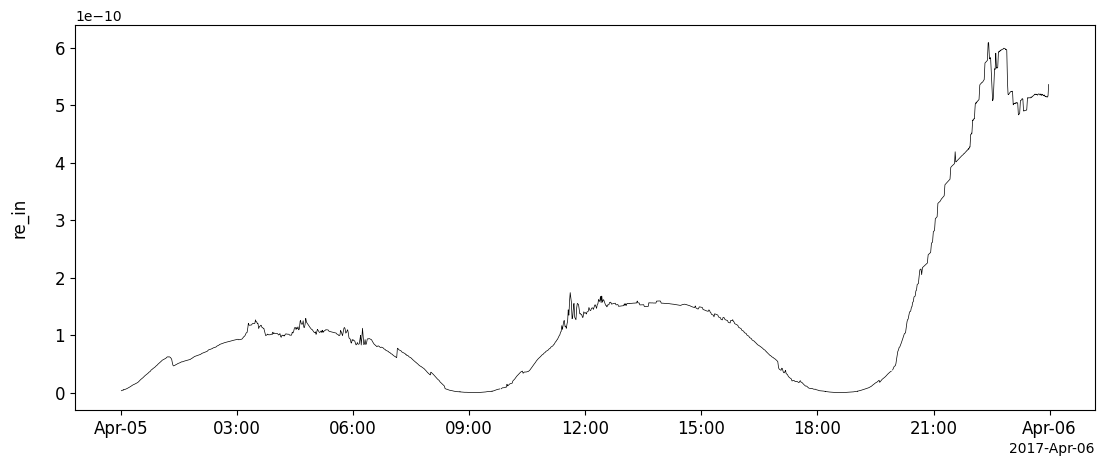

In [10]:
pytplot.tplot('re_in')